# GRIP : The Sparks Foundation

## Data Science and Business Analytics internship

# Name: Vudatha Rahul

# Task 1: Prediction using supervised ML

## Here it involves only two variables,it can be solved using simple linear regression.

In [2]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Reading data and loading it
data = "http://bit.ly/w-data"

#Turning it into a pandas dataframe
data = pd.read_csv(data)

#10 first lines from the data
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
#Important Mathematical Values
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
#Obtain informations about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


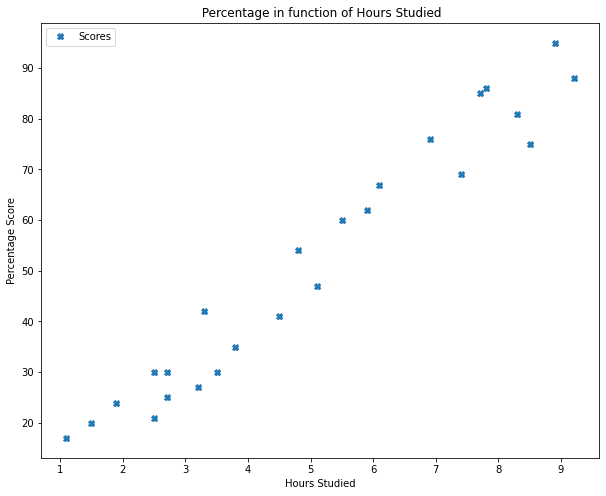

In [7]:
# Visualizing the Data 
# Plotting the distribution of scores:
data.plot(x='Hours', y='Scores', style='X', figsize=(10,8))  
plt.title(' Percentage in function of Hours Studied')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [8]:
data.corr(method='pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [9]:
data.corr(method='spearman')

,Hours,Scores
Hours,1.000000,0.971891
Scores,0.971891,1.000000


In [10]:
hours=data['Hours']
scores=data['Scores']

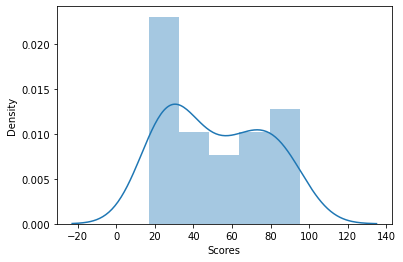

In [11]:
# To check for distribution of Scores in the dataset

sns.distplot(data['Scores'], bins=5)
plt.show()

# Linear regression

In [12]:
X=data.iloc[:, :-1].values
y=data.iloc[:, 1].values

# Train-Test Split

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [14]:
from sklearn.linear_model import LinearRegression

#build our logistic model
reg=LinearRegression()

#fitting training data
reg.fit(X_train,y_train)

LinearRegression()

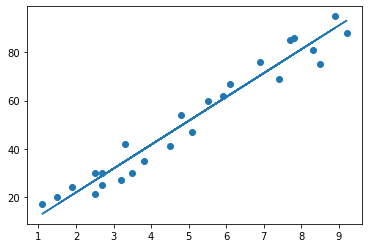

In [15]:
## Now we can define our line that we talked about in the previous graph
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [16]:
y_pred=reg.predict(X_test)

In [17]:
actual_predicted=pd.DataFrame({'Target':y_test,'Predicted':y_pred})
actual_predicted

,Target,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [18]:
h=9.25
s=reg.predict([[h]])
print("If a student studies for {} hours per day, she/he will score {} in the exams.".format(h,s))

If a student studies for 9.25 hours per day, she/he will score [93.69173249] in the exams.


# Model Evaluation

In [19]:
from sklearn import metrics
print('Mean Absolute Error : ',metrics.mean_absolute_error(y_test,y_pred))


y_pred  = reg.predict(X_test)
print("Accuracy={:.2f}".format(reg.score(X_test, y_test)))

Mean Absolute Error :  4.183859899002975
Accuracy=0.95


## Here we got 95% accuracy for our prediction.